## Importing Necessary Modules

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline  

## Importing csv files

In [3]:
true_data = genfromtxt('true_data.csv', delimiter=',')
sen_pos_data = genfromtxt('sen_pos_data.csv', delimiter=',')
sen_acc_data = genfromtxt('sen_acc_data.csv', delimiter=',')

In [4]:
true_vel = []
for i in range(199):
    v = (true_data[i+1] - true_data[i]) / 0.1
    true_vel.append(v)

true_acc = []
for i in range(198):
    a = (true_vel[i+1] - true_vel[i]) / 0.1
    true_acc.append(a)
    

## Observation that we are making - position 

In [5]:
z = np.c_[sen_acc_data]

## Defining Prediction Function

In [6]:
def Prediction(x_t_1, P_t_1, F_t, Q_t):
    x_t = F_t.dot(x_t_1)
    P_t = np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.T))) + Q_t
    return x_t, P_t


## Defining Update Function

In [7]:
def Update(x_t, P_t, Z_t, R_t, H_t):
    S = np.linalg.inv( H_t.dot(P_t).dot(H_t.T) + R_t )
    K = P_t.dot(H_t.T).dot(S)

    x_t = x_t + K.dot(Z_t - H_t.dot(x_t))
    P_t = P_t - K.dot(H_t).dot(P_t)

    return x_t, P_t


In [8]:
dt = 0.1

# Defining the Variables and Matrices

In [9]:
# Transition Matrix
F_t = np.array([    [1, dt, (1/2)*(dt**2)],
                    [0, 1, dt],
                    [0, 0, 1]      ])


# Process Covariance
process_var = 0.44
Q_t = process_var * np.array([   [(dt**4)/4, (dt**3)/2, (dt**2)/2],
                                 [(dt**3)/2, 2*(dt**3), (dt**2)],
                                 [(dt**2)/2, (dt**2), (dt**2)]      ])

# Measurement Covariance
R_t = 0.77

# Measurement Matrix
H_t = np.array([ [0, 0, 1] ])



### Initial State & Covariance 

In [10]:
# Initial State
x_t = np.array([ [0], [0], [0] ])

# Initial Covariance State 
P_t = 1 * np.identity(3)

In [11]:
# Empty Lists to save the estimated states
kalman_pos =[]
kalman_vel = []
kalman_acc = []

## Main Kalman Loop

In [12]:
for i in range(z.shape[0]):
    
    # Prediction Step
    x_t, P_t = Prediction(x_t,P_t,F_t,Q_t)

    # Reshaping the measurement data
    Z_t = z[i].transpose()
    Z_t = Z_t.reshape(Z_t.shape[0], -1)

    # Update Step
    x_t, P_t = Update(x_t,P_t,Z_t,R_t,H_t)

    kalman_pos.append(x_t[0])
    kalman_vel.append(x_t[1])
    kalman_acc.append(x_t[2])

In [13]:
print(" Final Filter State Matrix : \n\n", x_t)

 Final Filter State Matrix : 

 [[194.87784268]
 [ 19.68189823]
 [  0.98586234]]


In [14]:
# Plotting

kalman_pos = np.concatenate(kalman_pos).ravel()
kalman_vel = np.concatenate(kalman_vel).ravel()
kalman_acc = np.concatenate(kalman_acc).ravel()

x = np.linspace(0, 20, 200)

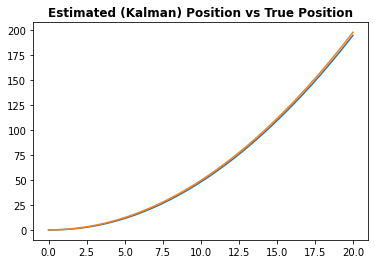

In [15]:
plt.title('Estimated (Kalman) Position vs True Position', fontweight='bold') 
plt.plot(x,kalman_pos)
plt.plot(x,true_data)

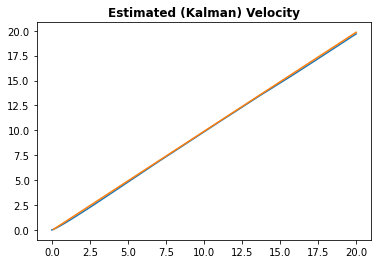

In [16]:
plt.title('Estimated (Kalman) Velocity', fontweight='bold') 
plt.plot(x,kalman_vel)
plt.plot(x[1:200],true_vel)

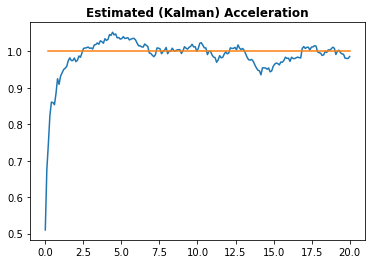

In [17]:
plt.title('Estimated (Kalman) Acceleration', fontweight='bold') 
plt.plot(x,kalman_acc)
plt.plot(x[2:200],true_acc)